In [9]:
import tensorflow as tf

2024-03-03 11:29:17.825007: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 11:29:34.355448: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load li

In [3]:
!gsutil -m cp -r "gs://plant-buddy-bucket/model-output" .

Copying gs://plant-buddy-bucket/model-output/keras_metadata.pb...
Copying gs://plant-buddy-bucket/model-output/saved_model.pb...                  
Copying gs://plant-buddy-bucket/model-output/variables/variables.data-00000-of-00001...
Copying gs://plant-buddy-bucket/model-output/variables/variables.index...       


In [10]:
saved_model = tf.keras.models.load_model('gs://plant-buddy-bucket/model_output_2')

# Check its architecture
saved_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [14]:
print("weights:", len(saved_model.weights))
print("non-trainable weights:", len(saved_model.non_trainable_weights))

weights: 262
non-trainable weights: 260


In [12]:
len(saved_model.get_layer(name='mobilenetv2_1.00_160').non_trainable_weights)

260

In [13]:
saved_model.get_layer(name='mobilenetv2_1.00_160').trainable = True

In [16]:
base_model = saved_model.get_layer(name='mobilenetv2_1.00_160')

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [27]:
if base_model.layers[100].trainable != True:
     raise ValueError("Base model is not trainable")

In [15]:
saved_model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         Y          
                                                                            
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         Y          
 )                                                                          
                                                                            
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         Y          
 a)                                                                         
                                                                            
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   Y          
 ional)                                                                     
                                                             

In [12]:
flower_model.get_layer(name='dense').output_shape != (None, 4271)

False

In [1]:
import pandas as pd

In [2]:
history = pd.read_csv('gs://plant-buddy-bucket/histories/history2.csv')

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']

training_loss = history['loss']
validation_loss = history['val_loss']

print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)

Training Accuracy: 0     0.719209
1     0.722566
2     0.725563
3     0.727783
4     0.730405
5     0.733880
6     0.735069
7     0.739504
8     0.740159
9     0.742711
10    0.745507
11    0.747801
12    0.748406
13    0.751548
14    0.751702
Name: accuracy, dtype: float64
Validation Accuracy: 0     0.154891
1     0.155535
2     0.155242
3     0.155418
4     0.155125
5     0.155271
6     0.155535
7     0.155945
8     0.156266
9     0.155213
10    0.155301
11    0.155154
12    0.155066
13    0.155388
14    0.155798
Name: val_accuracy, dtype: float64
Training Loss: 0     1.191868
1     1.162548
2     1.137489
3     1.123207
4     1.110076
5     1.087077
6     1.081575
7     1.055641
8     1.046512
9     1.031640
10    1.016346
11    1.004816
12    0.995385
13    0.982793
14    0.973492
Name: loss, dtype: float64
Validation Loss: 0     10.654334
1     10.644898
2     10.642955
3     10.637609
4     10.627039
5     10.622716
6     10.626637
7     10.627917
8     10.634846
9     10.643703


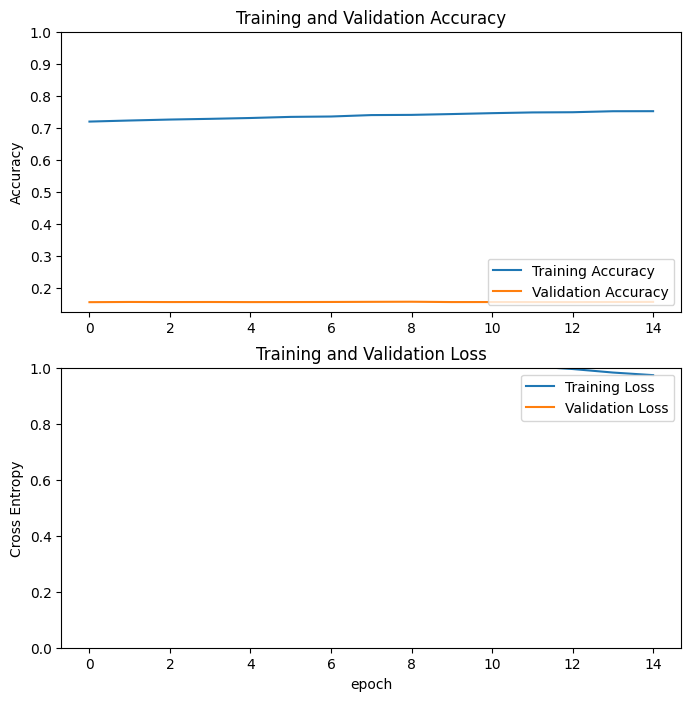

In [5]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [4]:
import matplotlib.pyplot as plt

In [6]:
history.epoch

AttributeError: 'DataFrame' object has no attribute 'epoch'

In [7]:
history['epoch']

KeyError: 'epoch'